# Gauge Visual for Numeric Data

In [2]:
%matplotlib inline

start: [  0.  36.  72. 108. 144.]
end: [ 36.  72. 108. 144. 180.]
Mid Points: [ 18.  54.  90. 126. 162.]
[[  0.  36.]
 [ 36.  72.]
 [ 72. 108.]
 [108. 144.]
 [144. 180.]] [ 18.  54.  90. 126. 162.]


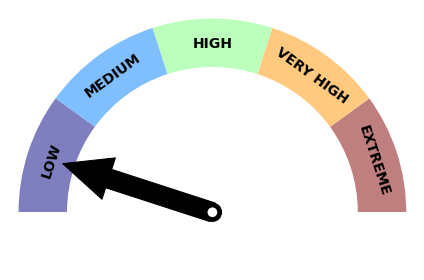

In [44]:
import os, sys
import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Wedge, Rectangle


def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    print(f"start: {start}")
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    print(f"end: {end}")
    mid_points = start + ((end-start)/2.)
    print(f"Mid Points: {mid_points}")
    print(np.c_[start, end], mid_points)
    return np.c_[start, end], mid_points


def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

labels=['LOW','MEDIUM','HIGH','VERY HIGH','EXTREME']
colors='jet_r'
arrow=1
title=''
fname=False
    
"""
some sanity checks first

"""

N = len(labels)

if arrow > N: 
    raise Exception("\n\nThe category ({}) is greated than \
    the length\nof the labels ({})".format(arrow, N))


"""
if colors is a string, we assume it's a matplotlib colormap
and we discretize in N discrete colors 
"""

if isinstance(colors, str):
    cmap = cm.get_cmap(colors, N)
    cmap = cmap(np.arange(N))
    colors = cmap[::-1,:].tolist()
if isinstance(colors, list): 
    if len(colors) == N:
        colors = colors[::-1]
    else: 
        raise Exception("\n\nnumber of colors {} not equal \
        to number of categories{}\n".format(len(colors), N))

"""
begins the plotting
"""

fig, ax = plt.subplots()

ang_range, mid_points = degree_range(N)

labels = labels[::-1]

"""
plots the sectors and the arcs
"""
patches = []
for ang, c in zip(ang_range, colors): 
    # sectors
    patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
    # arcs
    patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))

[ax.add_patch(p) for p in patches]


"""
set the labels (e.g. 'LOW','MEDIUM',...)
"""

for mid, lab in zip(mid_points, labels): 

    ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
        horizontalalignment='center', verticalalignment='center', fontsize=14, \
        fontweight='bold', rotation = rot_text(mid))

"""
set the bottom banner and the title
"""
r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
ax.add_patch(r)

ax.text(0, -0.05, title, horizontalalignment='center', \
        verticalalignment='center', fontsize=22, fontweight='bold')

"""
plots the arrow now
"""

pos = mid_points[abs(arrow - N)]

ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')

ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

"""
removes frame and ticks, and makes axis equal and tight
"""

ax.set_frame_on(False)
ax.axes.set_xticks([])
ax.axes.set_yticks([])
ax.axis('equal')
plt.tight_layout()
if fname:
    fig.savefig(fname, dpi=200)

## TESTING

[[  0.  45.]
 [ 45.  90.]
 [ 90. 135.]
 [135. 180.]] [ 22.5  67.5 112.5 157.5]


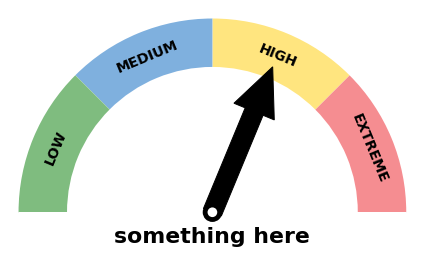

In [16]:
gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
      colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], arrow=3, title='something here') 

In [5]:
# Prolog - Auto Generated #
import os, uuid, matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot
import pandas as pd

os.chdir(u'C:/Users/P_W_D/PythonEditorWrapper_585200fa-6299-4cd7-a5c0-98a2540a344c')
dataset = pandas.read_csv('input_df_bb752256-60c5-455b-a93e-0794487a5373.csv')

matplotlib.pyplot.figure(figsize=(5.55555555555556,4.16666666666667))
matplotlib.pyplot.show = lambda args=None,kw=None: matplotlib.pyplot.savefig(str(uuid.uuid1()))
# Original Script. Please update your script content here and once completed copy below section back to the original editing window #
##############################

<Figure size 400x300 with 0 Axes>

In [19]:
import pandas as pd

dataset = {
    'Value': [6]
    , 'Min': [0]
    , 'Max': [12]
    , 'L1': [3]
    , 'L2': [5]
    , 'L3': [7]
    , 'L4': [np.nan]
}
dataset = pd.DataFrame(dataset)

datalist = dataset.values.tolist()[0]

g_val = datalist[0]
g_min = datalist[1]
g_max = datalist[2]
g_l = [x for x in datalist[3:] if np.isnan(x) == False]

g_range = g_max - g_min

def angle_conversion(orig_val, orig_range, orig_min):
    val = (orig_val - orig_min) / orig_range * 180
    return val

for x in g_l:
    print(angle_conversion(x, g_range, g_min))

45.0
75.0
105.0


In [23]:
def angle_conversion(orig_val, orig_min, orig_max):
    val = (orig_val - orig_min) / (orig_max - orig_min) * 180
    return val

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points


def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

In [24]:
def gauge(labels=[3,5,7], val=6, min=0, max=12, colors='jet_r'
    , arrow=1, title='', fname=False): 
    
    """
    some sanity checks first
    
    """
    
    N = len(labels)+1
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))
 
    
    """
    if colors is a string, we assume it's a matplotlib colormap
    and we discretize in N discrete colors 
    """
    
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    mid_points = []
    for x in labels:
        mid_points.append(angle_conversion(x, g_range, g_min))

    ang_range = [angle_conversion(min, min, max), angle_conversion(max, min, max)]

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

TypeError: type object argument after * must be an iterable, not float

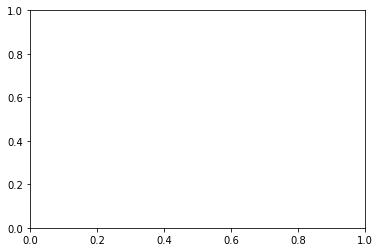

In [25]:
gauge()

TypeError: __init__() takes from 5 to 6 positional arguments but 7 were given

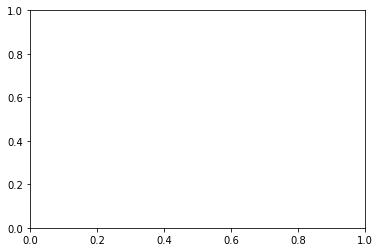

In [67]:
def angle_conversion(orig_val, orig_min, orig_max):
    val = (orig_val - orig_min) / (orig_max - orig_min) * 180
    return val

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

labels=[2,5,7]
val=6
min=0
max=12
colors='jet_r'
arrow=1
title=''
fname=False 
    
"""
some sanity checks first

"""

N = len(labels)+1

if arrow > N: 
    raise Exception("\n\nThe category ({}) is greated than \
    the length\nof the labels ({})".format(arrow, N))


"""
if colors is a string, we assume it's a matplotlib colormap
and we discretize in N discrete colors 
"""

if isinstance(colors, str):
    cmap = cm.get_cmap(colors, N)
    cmap = cmap(np.arange(N))
    colors = cmap[::-1,:].tolist()
if isinstance(colors, list): 
    if len(colors) == N:
        colors = colors[::-1]
    else: 
        raise Exception("\n\nnumber of colors {} not equal \
        to number of categories{}\n".format(len(colors), N))

"""
begins the plotting
"""

fig, ax = plt.subplots()

mid_points = []
for x in labels:
    mid_points.append(angle_conversion(x, min, max))

start = []
end = []
for i, val in enumerate(mid_points):
    if i == 0:
        start.append(0)
        end.append(val)
    else:
        start.append(mid_points[i-1]) 
        end.append(val)
start.append(mid_points[i])
end.append(180)

ang_range = np.c_[start, end], mid_points



# labels = labels[::-1]

"""
plots the sectors and the arcs
"""
patches = []
for ang, c in zip(ang_range, colors): 
    # sectors
    patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
    # arcs
    patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))

[ax.add_patch(p) for p in patches]


# """
# set the labels (e.g. 'LOW','MEDIUM',...)
# """

# for mid, lab in zip(mid_points, labels): 

#     ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
#         horizontalalignment='center', verticalalignment='center', fontsize=14, \
#         fontweight='bold', rotation = rot_text(mid))

# """
# set the bottom banner and the title
# """
# r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
# ax.add_patch(r)

# ax.text(0, -0.05, title, horizontalalignment='center', \
#         verticalalignment='center', fontsize=22, fontweight='bold')

# """
# plots the arrow now
# """

# pos = mid_points[abs(arrow - N)]

# ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
#                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')

# ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
# ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

# """
# removes frame and ticks, and makes axis equal and tight
# """

# ax.set_frame_on(False)
# ax.axes.set_xticks([])
# ax.axes.set_yticks([])
# ax.axis('equal')
# plt.tight_layout()
# if fname:
#     fig.savefig(fname, dpi=200)

In [66]:
for ang, c in zip(ang_range, colors):
    print(f"ang: {ang}, c: {c}")
ang_range
print(start)
print(end)

ang: [[  0.  30.]
 [ 30.  75.]
 [ 75. 105.]
 [105. 180.]], c: [0.5, 0.0, 0.0, 1.0]
ang: [30.0, 75.0, 105.0], c: [1.0, 0.9012345679012345, 0.0, 1.0]
[0, 30.0, 75.0, 105.0]
[30.0, 75.0, 105.0, 180]


In [45]:
for ang, c in zip(ang_range, colors):
    print(f"ang: {ang}, c: {c}")

ang_range

degree_range(4)

ang: [ 0. 36.], c: [0.5, 0.0, 0.0, 1.0]
ang: [36. 72.], c: [1.0, 0.5925925925925927, 0.0, 1.0]
ang: [ 72. 108.], c: [0.4838709677419355, 1.0, 0.48387096774193566, 1.0]
ang: [108. 144.], c: [0.0, 0.5, 1.0, 1.0]
ang: [144. 180.], c: [0.0, 0.0, 0.5, 1.0]
start: [  0.  45.  90. 135.]
end: [ 45.  90. 135. 180.]
Mid Points: [ 22.5  67.5 112.5 157.5]
[[  0.  45.]
 [ 45.  90.]
 [ 90. 135.]
 [135. 180.]] [ 22.5  67.5 112.5 157.5]


(array([[  0.,  45.],
        [ 45.,  90.],
        [ 90., 135.],
        [135., 180.]]),
 array([ 22.5,  67.5, 112.5, 157.5]))